# Prepare Data

In [1]:
# https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html
from sksurv.datasets import load_veterans_lung_cancer

# Load data
DATA, data_y = load_veterans_lung_cancer()

# Usually, covariates and targets are in the same place
DATA["pcens"] = list(map(lambda pair: pair[0], data_y))
DATA["psurv"] = list(map(lambda pair: pair[1], data_y))

# Use more explicit labels for pcens
DATA["pcens"] = DATA["pcens"].apply(lambda x: "Dead" if x else "Censored")

# Rename columns
DATA = DATA.rename(mapper=lambda col: col.lower(), axis=1)
DATA = DATA.rename(mapper={"age_in_years": "age", "celltype": "cell_type"}, axis=1)

print("This dataset contains {0} rows and {1} columns.".format(*DATA.shape))

This dataset contains 137 rows and 8 columns.


In [2]:
# https://github.com/AchilleSalaun/Xamelot
from xmlot.data.split import sample_dataset

sample_dataset(DATA, n=16, main_target="pcens")[:5]

,age,cell_type,karnofsky_score,months_from_diagnosis,prior_therapy,treatment,pcens,psurv
50,63.0,adeno,50.0,4.0,yes,standard,Dead,12.0
54,66.0,large,50.0,16.0,yes,standard,Dead,177.0
105,59.0,smallcell,30.0,87.0,yes,test,Dead,51.0
11,63.0,squamous,40.0,58.0,yes,standard,Dead,8.0
122,42.0,adeno,50.0,10.0,no,test,Dead,19.0


In [3]:
from xmlot.data.describe   import Descriptor, Entry

# Descriptors store a description of each column.
# It also contains required information to certain function (e.g. embed_data)
DESCRIPTOR = Descriptor([
    Entry(
        "age",
        description="Patient age, in years.",
        is_categorical=False,
        tags="feature"
    ),
    Entry(
        "cell_type",
        description="Type of cell.",
        is_categorical=True,
        tags="feature"
    ),
    Entry(
        "karnofsky_score",
        description="""The Karnofsky Performance Scale Index is an assessment tool for functional impairment. 
        It can be used to compare effectiveness of different therapies and to assess the prognosis in individual patients. 
        In most serious illnesses, the lower the Karnofsky score, the worse the likelihood of survival.
        """,
        is_categorical=False,
        tags="feature"
    ),
    Entry(
        "months_from_diagnosis",
        description="Time since diagnosis, in months.",
        is_categorical=False,
        tags="feature"
    ),
    Entry(
        "prior_therapy",
        description="Did the patient already have a therapy.",
        is_categorical=True,
        categorical_keys={
            "no"  : 0,
            "yes" : 1
        },
        tags="feature"
    ),
    Entry(
        "treatment",
        description="Type of treatment.",
        is_categorical=True,
        categorical_keys={
            "standard" : 0,
            "test"     : 1
        },
        tags="feature"
    ),
    Entry(
        "pcens",
        description="Patient survival event.",
        is_categorical=True,
        categorical_keys={
            "Censored" : 0,
            "Dead"     : 1
        },
        tags="target"
    ),
    Entry(
        "psurv",
        description="Patient survival time.",
        is_categorical=False,
        tags="target"
    ),
    Entry(
        "pclass",
        description="Patient survival at specific time.",
        is_categorical=True,
        tags="target"
    ),
    
])

age:
	> Patient age, in years.
	> This column is numerical (type: ).
	> It belongs to files: .
	> It has been tagged as: feature.

density : 1.0
min     : 34.0
max     : 81.0
mean    : 58.306569343065696
std     : 10.541627597708011


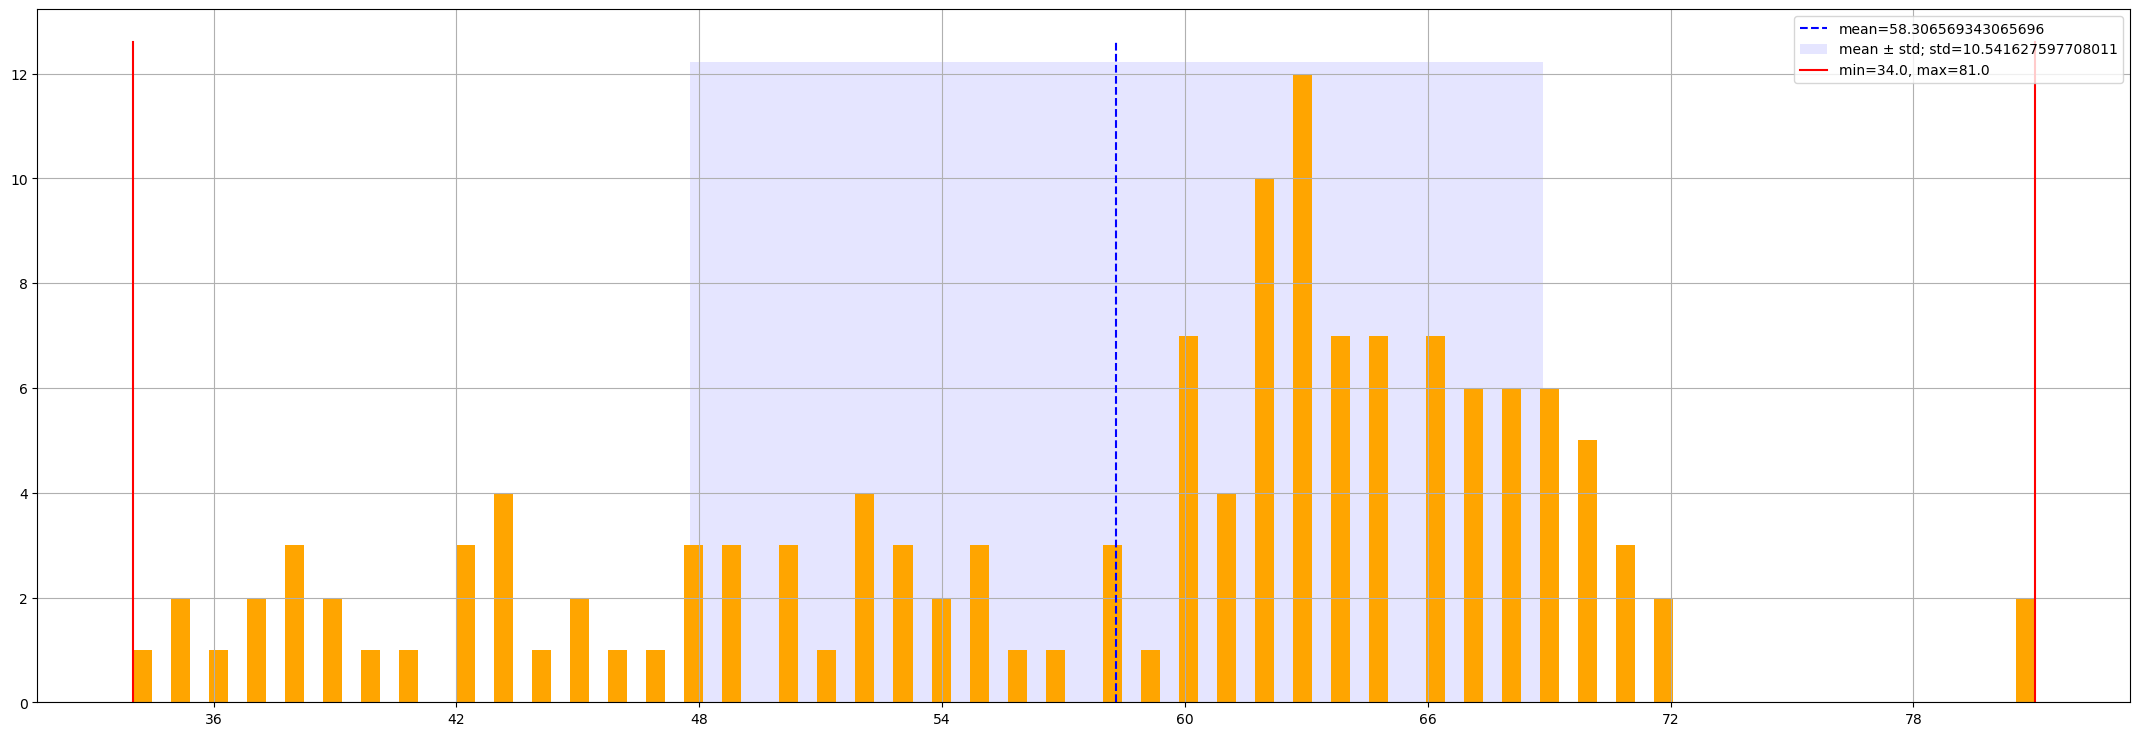


##################################################

cell_type:
	> Type of cell.
	> This column is categorical (type: ).
	> It belongs to files: .
	> It has been tagged as: feature.

Density: 1.0
cell_type
smallcell    48
squamous     35
adeno        27
large        27
Name: count, dtype: int64


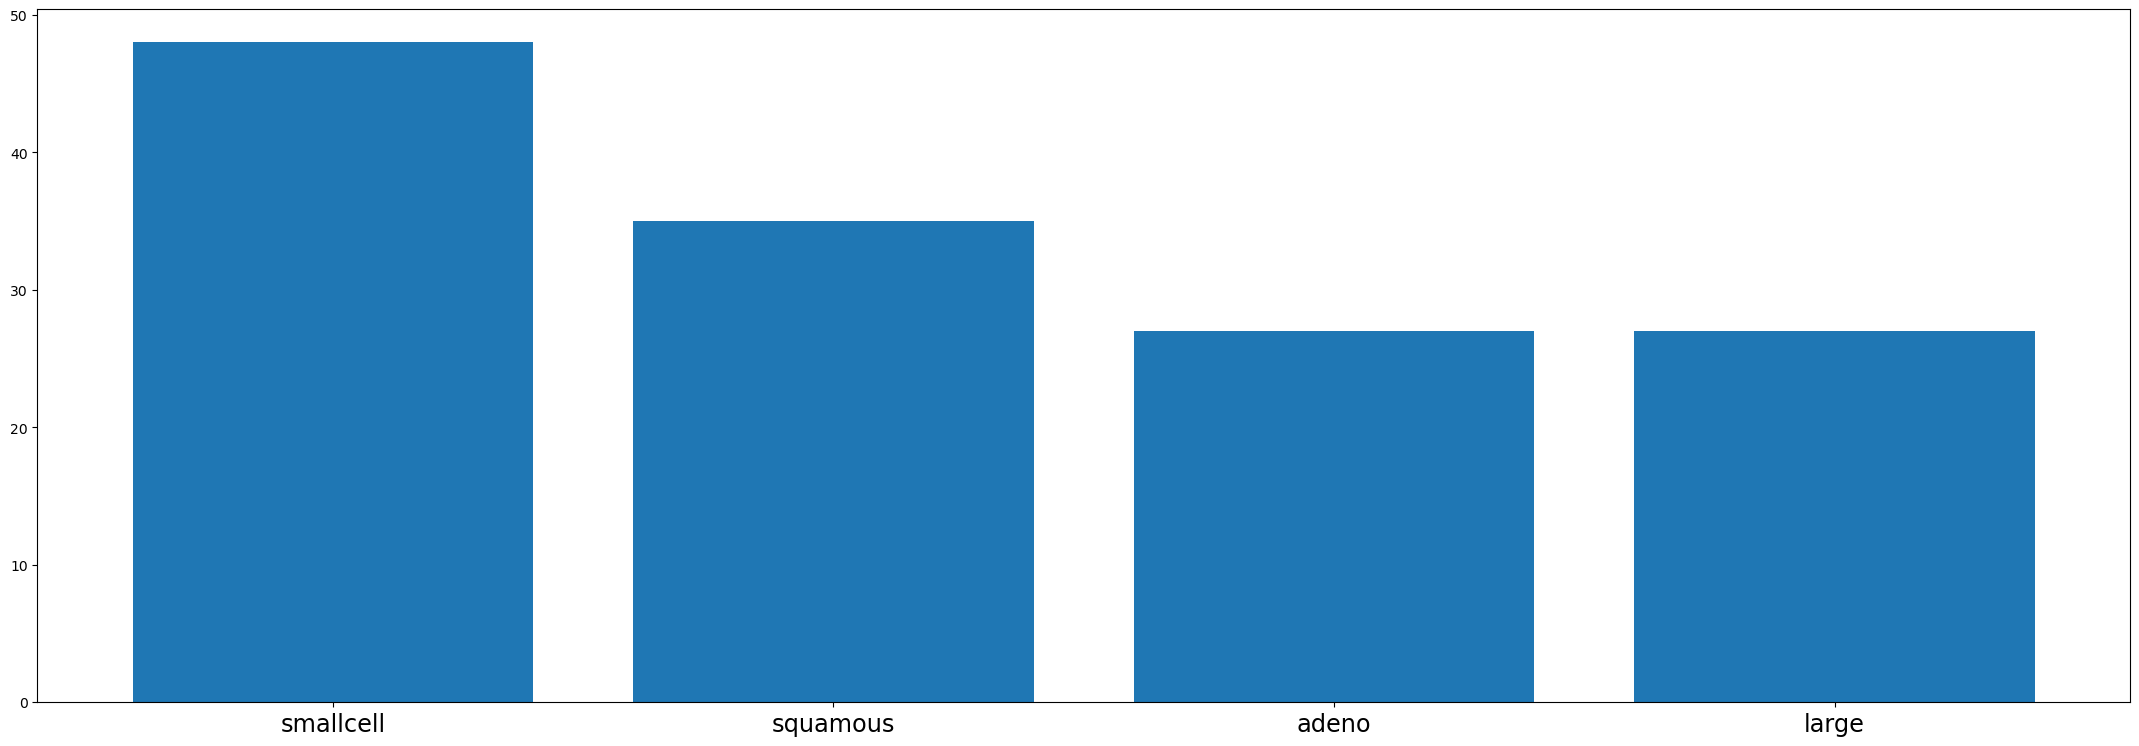


##################################################

karnofsky_score:
	> The Karnofsky Performance Scale Index is an assessment tool for functional impairment. 
        It can be used to compare effectiveness of different therapies and to assess the prognosis in individual patients. 
        In most serious illnesses, the lower the Karnofsky score, the worse the likelihood of survival.
        
	> This column is numerical (type: ).
	> It belongs to files: .
	> It has been tagged as: feature.

density : 1.0
min     : 10.0
max     : 99.0
mean    : 58.56934306569343
std     : 20.039591555526336


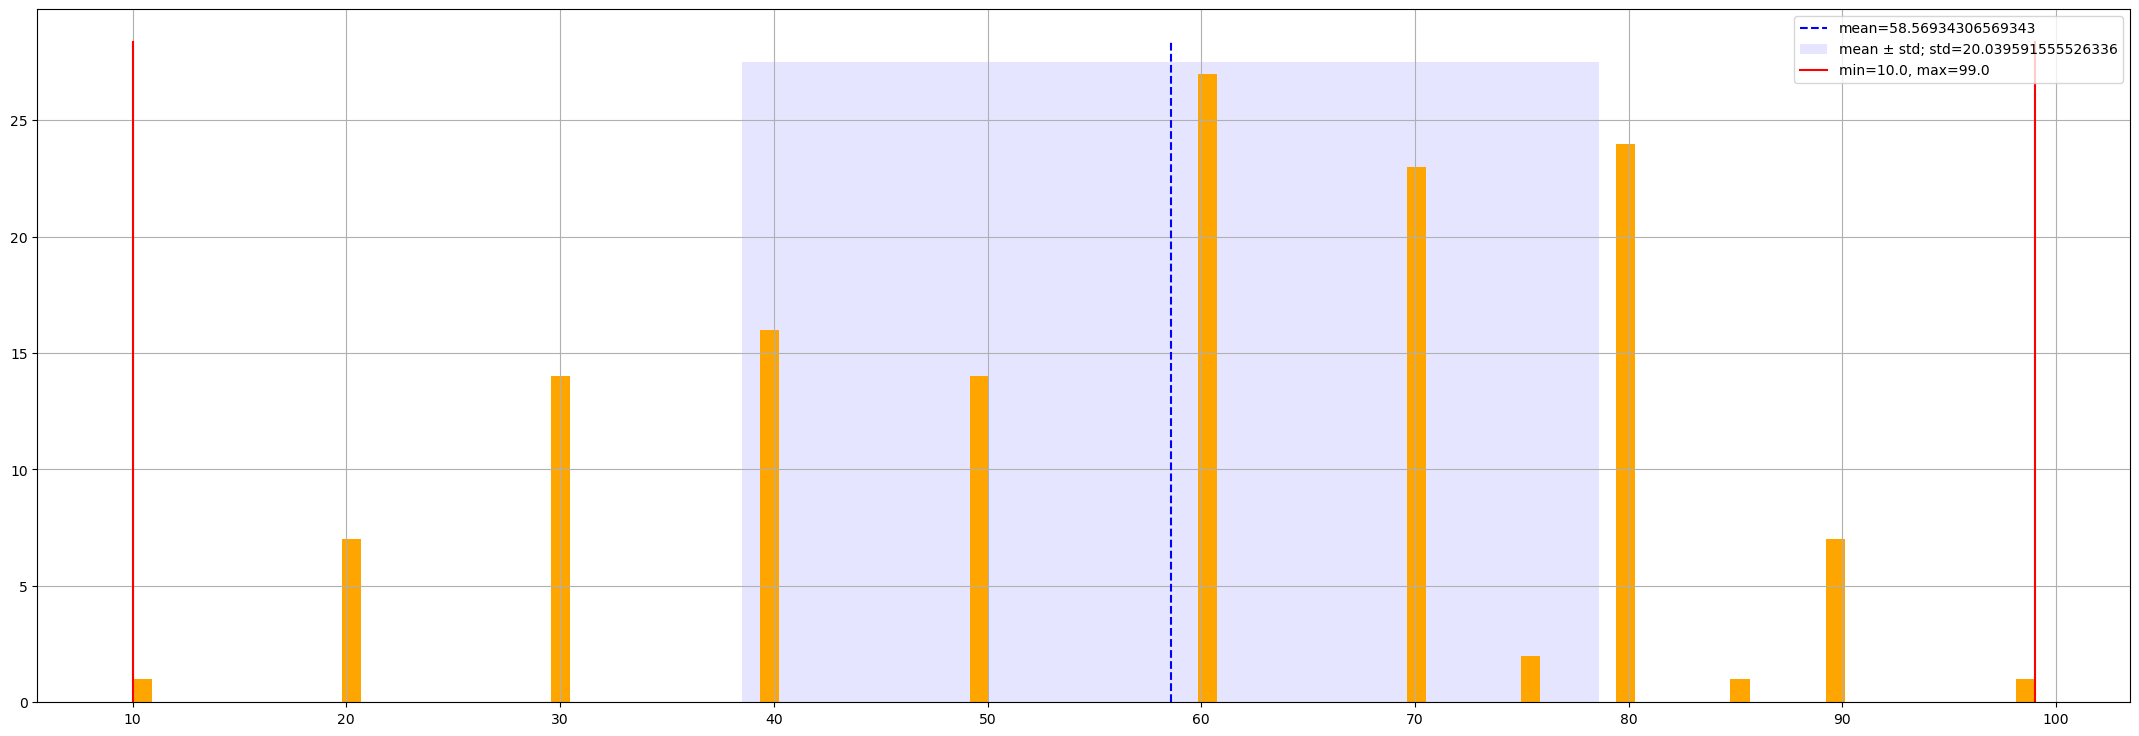


##################################################

months_from_diagnosis:
	> Time since diagnosis, in months.
	> This column is numerical (type: ).
	> It belongs to files: .
	> It has been tagged as: feature.

density : 1.0
min     : 1.0
max     : 87.0
mean    : 8.773722627737227
std     : 10.612141146659166


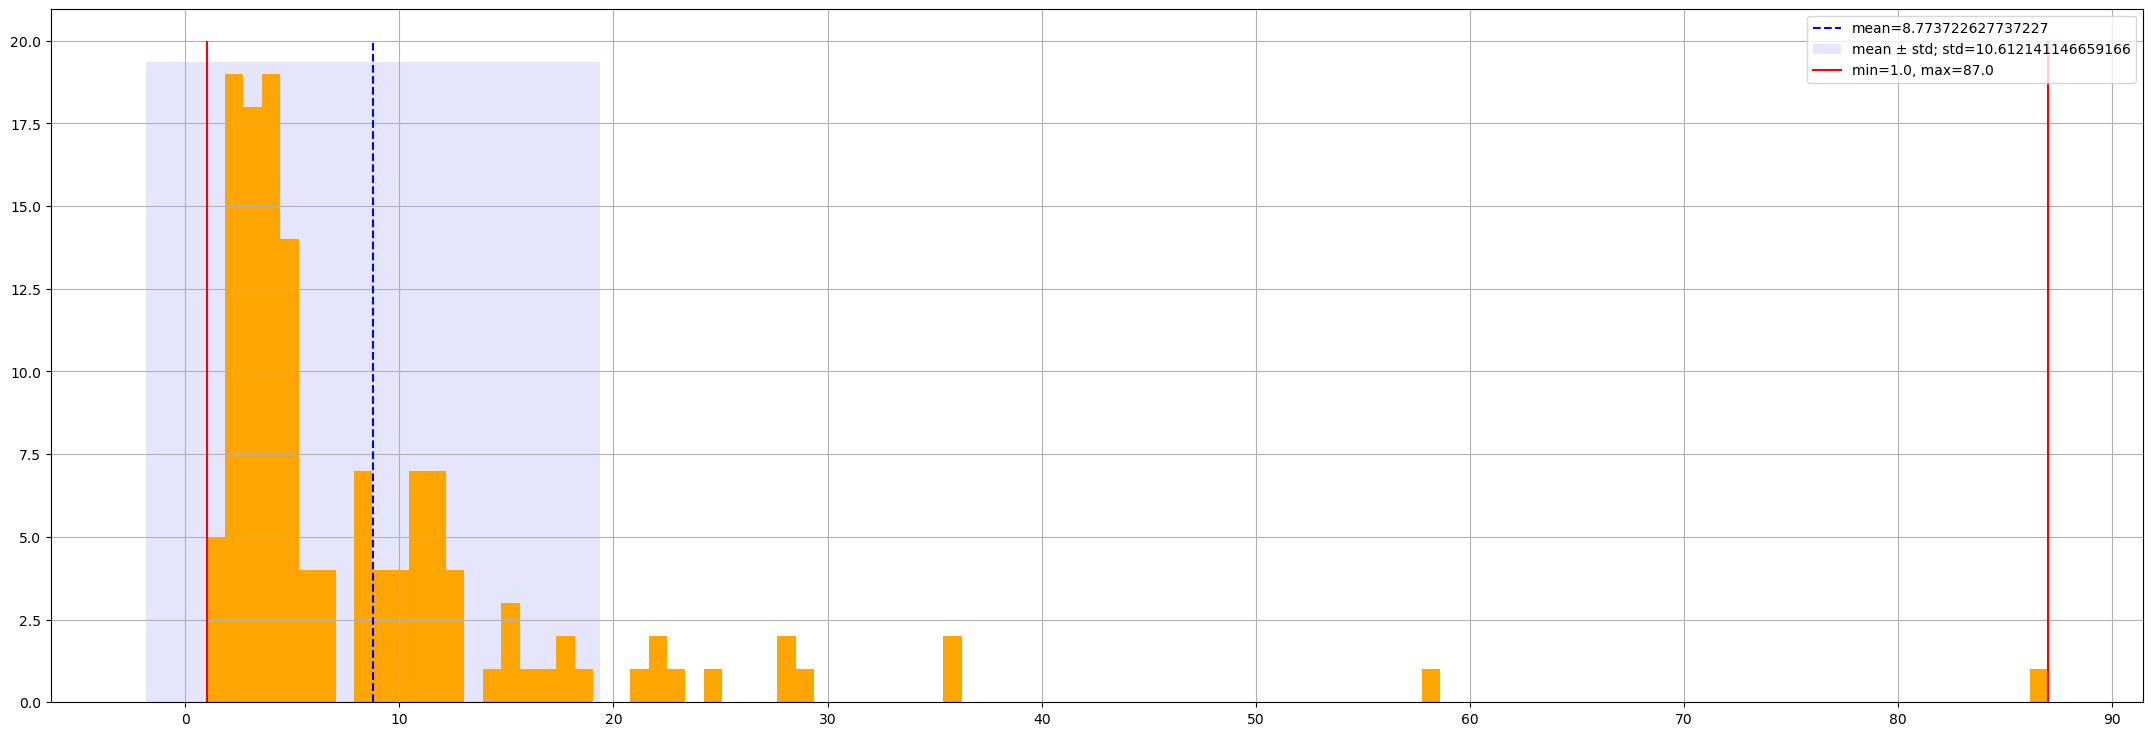


##################################################

prior_therapy:
	> Did the patient already have a therapy.
	> This column is categorical (type: ).
		> no  : 0
		> yes : 1
	> It belongs to files: .
	> It has been tagged as: feature.

Density: 1.0
prior_therapy
no     97
yes    40
Name: count, dtype: int64


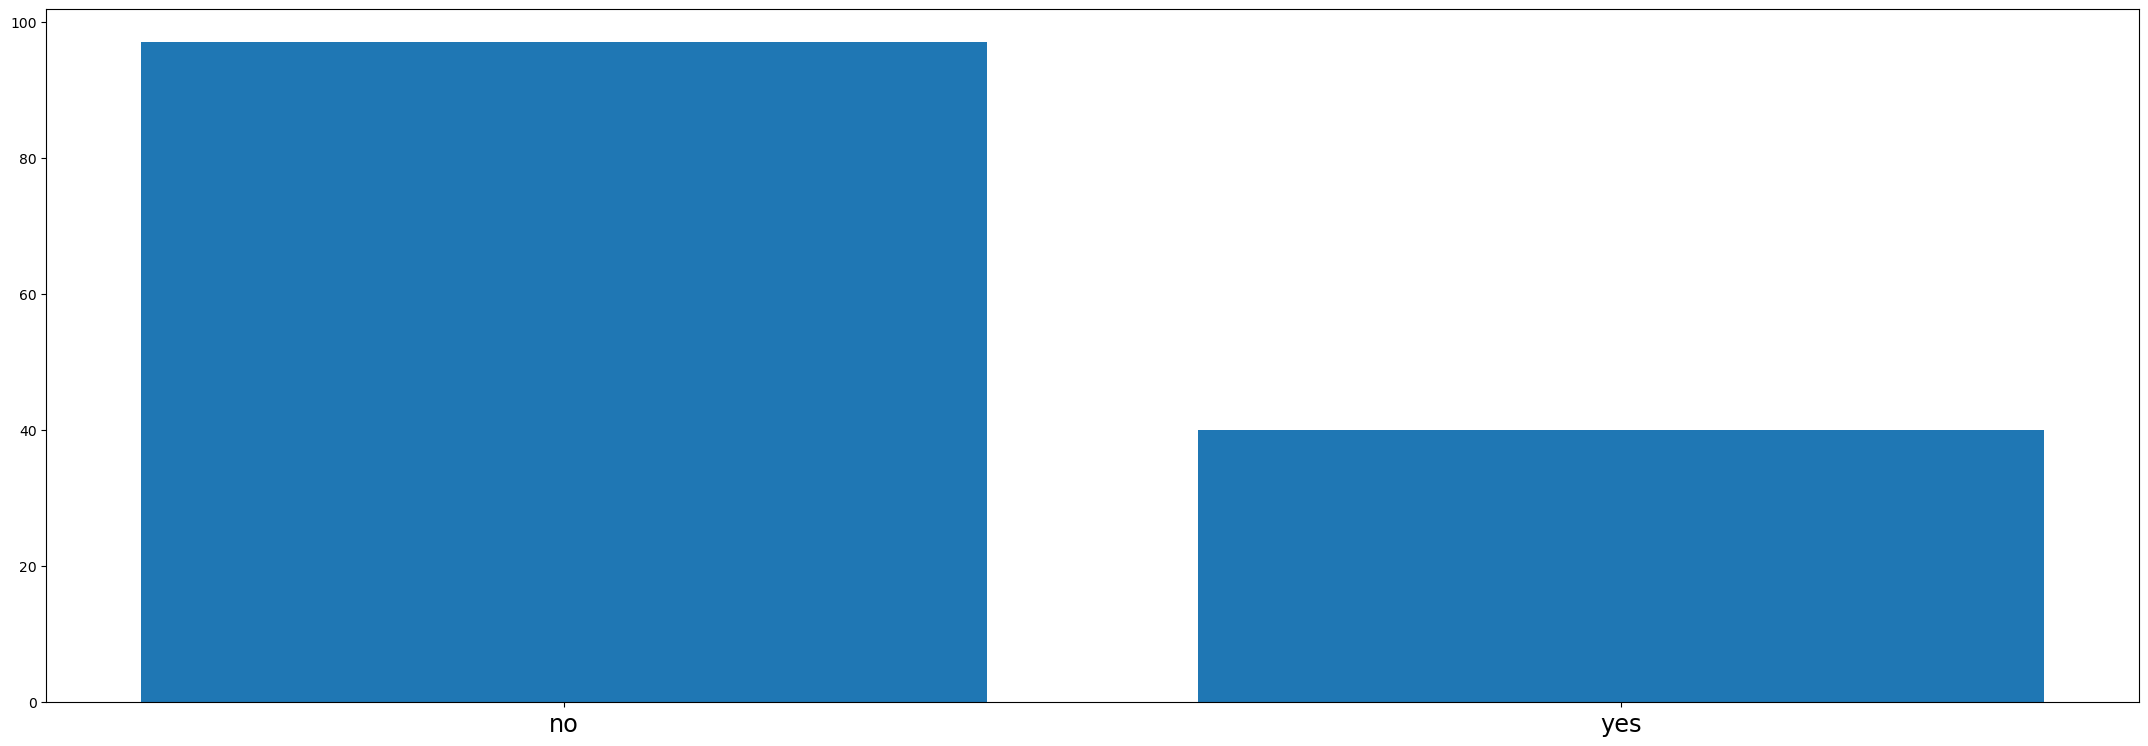


##################################################

treatment:
	> Type of treatment.
	> This column is categorical (type: ).
		> standard : 0
		> test     : 1
	> It belongs to files: .
	> It has been tagged as: feature.

Density: 1.0
treatment
standard    69
test        68
Name: count, dtype: int64


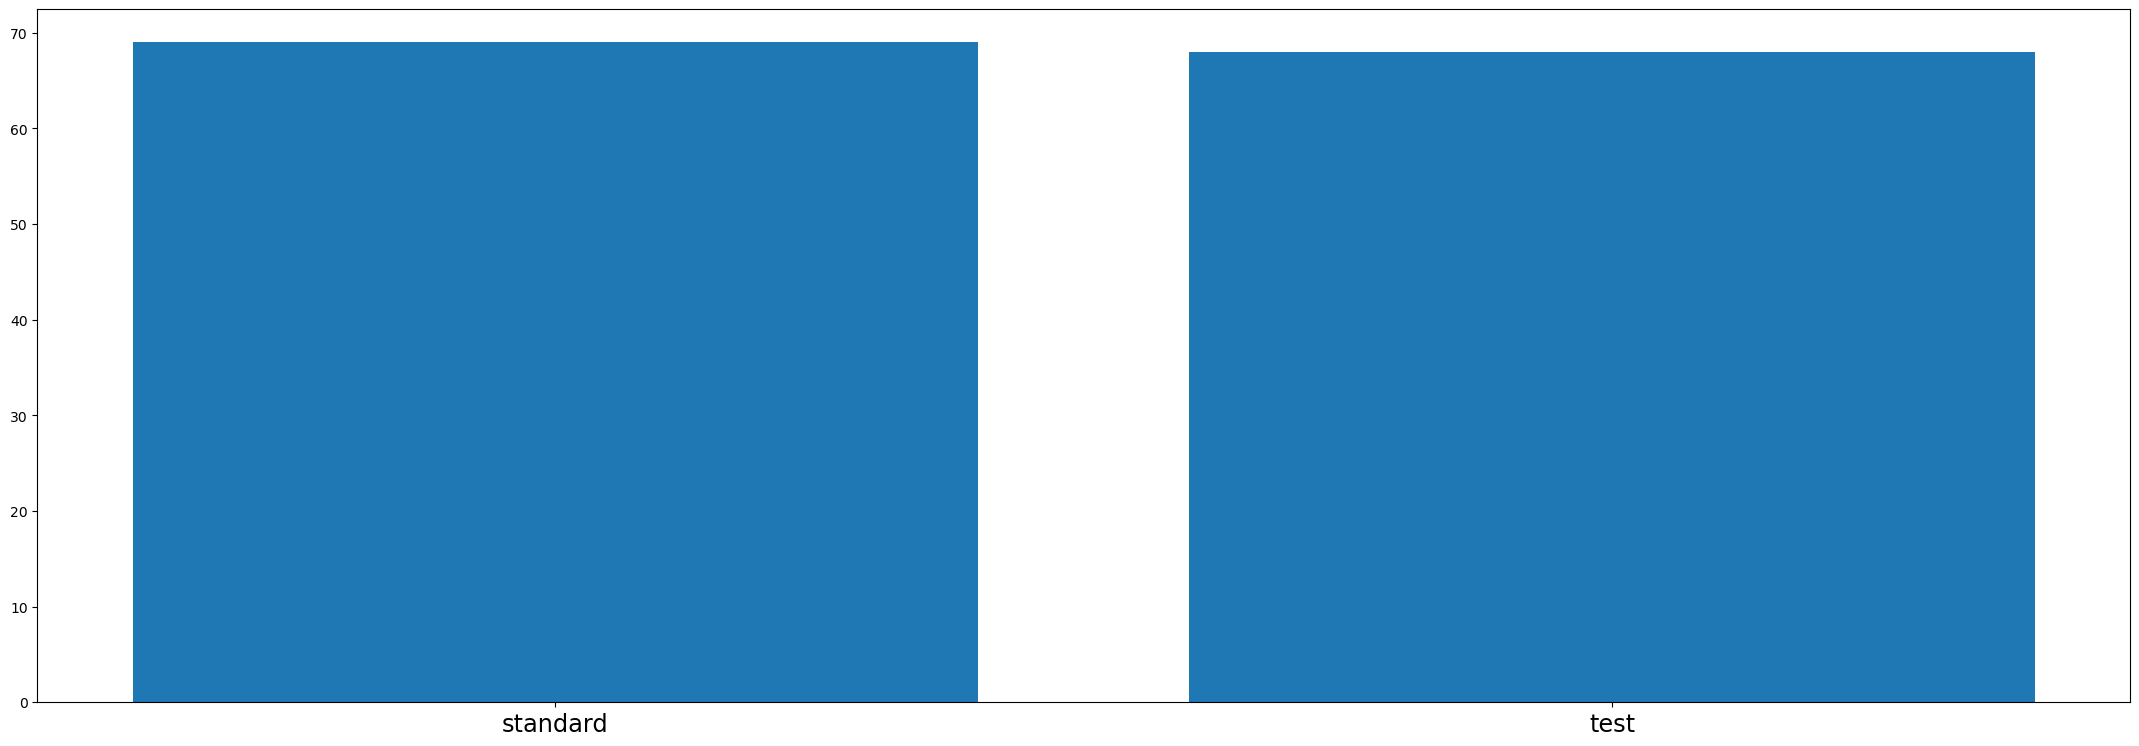


##################################################

pcens:
	> Patient survival event.
	> This column is categorical (type: ).
		> Censored : 0
		> Dead     : 1
	> It belongs to files: .
	> It has been tagged as: target.

Density: 1.0
pcens
Dead        128
Censored      9
Name: count, dtype: int64


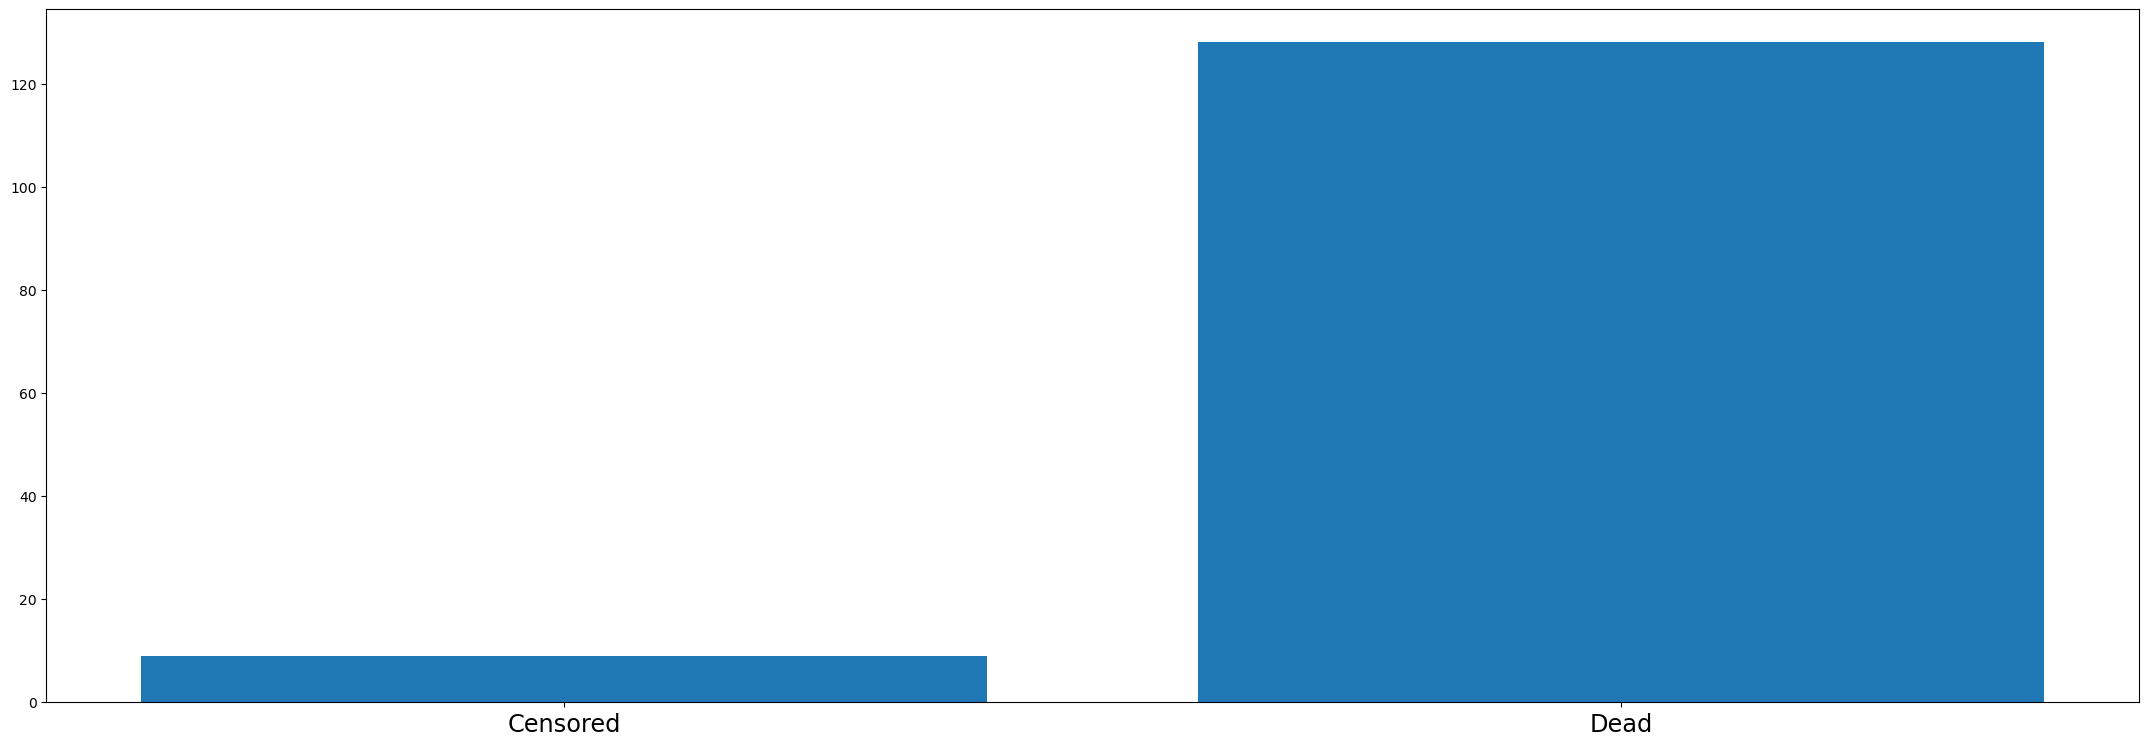


##################################################

psurv:
	> Patient survival time.
	> This column is numerical (type: ).
	> It belongs to files: .
	> It has been tagged as: target.

density : 1.0
min     : 1.0
max     : 999.0
mean    : 121.62773722627738
std     : 157.81672203667466


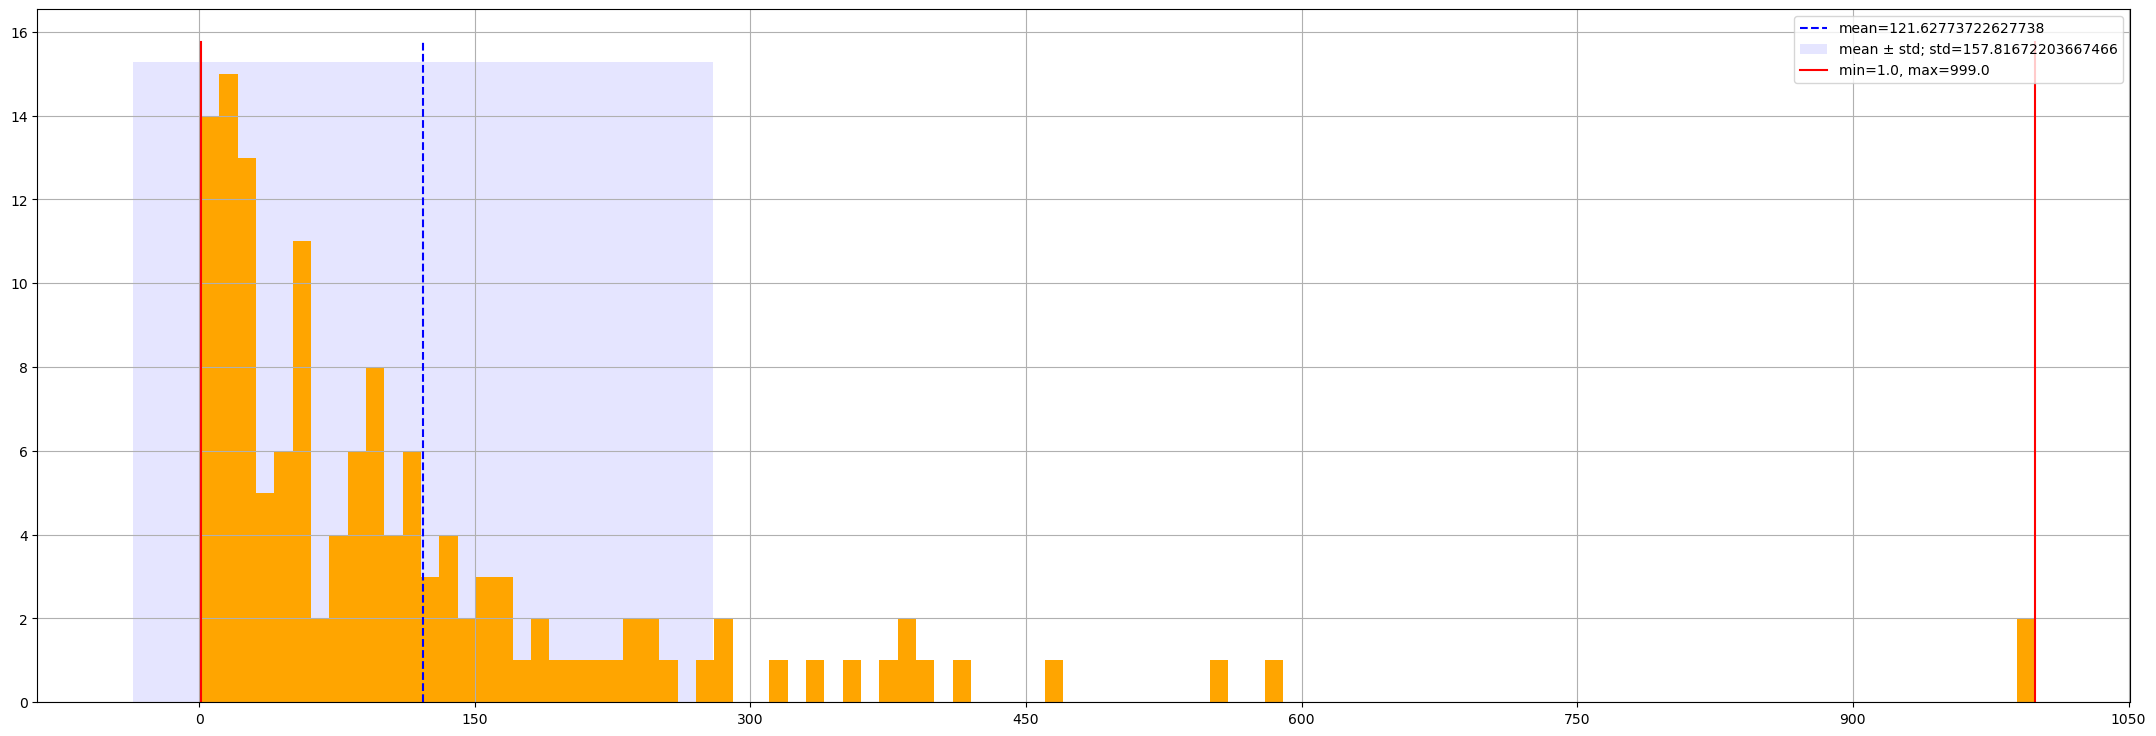

In [4]:
from xmlot.data.describe import print_summary

print_summary(DATA, DESCRIPTOR)

In [5]:
from xmlot.data.embed      import embed_data, TalkativeEmbedDataVisitor

# One-hot encode categorical data.
EMBEDDED_DATA, OHE = embed_data(
    DATA,
    threshold          = .5,
    descriptor         = DESCRIPTOR,
    targets_to_focus   = ["pcens", "psurv"],
    separator          = "#",
    exceptions         = [],
    default_categories = {
        "cell_type": "adeno",
        "prior_therapy" : "no",
        "treatment"     : "standard",
        "pcens"         : "Censored"
    },  
    visitor            = TalkativeEmbedDataVisitor(),

)

EMBEDDED_DATA.head()

Starting embedding...
	Before embedding, the dataset has 137 rows and 8 columns.

Selecting targets...
	We focus on the following targets: `['pcens', 'psurv']`.
	Then, the dataset has 137 rows and 8 columns.

Finalizing embedding...
	At this point, the dataset has 137 rows and 10 columns.


,age,cell_type#smallcell,cell_type#squamous,cell_type#large,karnofsky_score,months_from_diagnosis,prior_therapy,treatment,pcens,psurv
0,69.0,0.0,1.0,0.0,60.0,7.0,0.0,0.0,1.0,72.0
1,64.0,0.0,1.0,0.0,70.0,5.0,1.0,0.0,1.0,411.0
2,38.0,0.0,1.0,0.0,60.0,3.0,0.0,0.0,1.0,228.0
3,63.0,0.0,1.0,0.0,60.0,9.0,1.0,0.0,1.0,126.0
4,65.0,0.0,1.0,0.0,70.0,11.0,1.0,0.0,1.0,118.0


In [6]:
from xmlot.data.dataframes import build_survival_accessor

# Accessors help handling features, targets, events, durations, etc.
PSURV_CODE  = "psurv"
build_survival_accessor(
    "pcens", 
    "psurv", 
    accessor_code=PSURV_CODE, 
    exceptions=["pclass"]
)

xmlot.data.dataframes.build_survival_accessor.<locals>.SurvivalAccessor

In [7]:
# For example, accessing the survival of a dataset can be done a follows:
DATA.psurv.durations.head()

0     72.0
1    411.0
2    228.0
3    126.0
4    118.0
Name: psurv, dtype: float64

In [8]:
# Or as follows:
accessor = getattr(DATA, PSURV_CODE)
accessor.durations.head()

0     72.0
1    411.0
2    228.0
3    126.0
4    118.0
Name: psurv, dtype: float64

In [9]:
from xmlot.data.scale import Scaler, get_standardisation
from xmlot.data.split import split_dataset

# Split data in train/test datasets.
DATA_TRAIN, DATA_TEST = split_dataset(EMBEDDED_DATA, [.8, .2], main_target="pcens")

# Scale (standardisation) data based on the training dataset.
SCALER = Scaler(
    DATA_TRAIN,
    PSURV_CODE,
    OHE,
    **get_standardisation(DATA_TRAIN)
)

DATA_TRAIN = SCALER(DATA_TRAIN)
DATA_TEST  = SCALER(DATA_TEST)

DATA_TRAIN.head()

,age,cell_type#smallcell,cell_type#squamous,cell_type#large,karnofsky_score,months_from_diagnosis,prior_therapy,treatment,pcens,psurv
119,0.513933,0.0,0.0,0.0,0.563709,-0.645855,0.0,1.0,1.0,140.0
80,0.513933,0.0,1.0,0.0,-2.015816,3.187712,0.0,1.0,1.0,25.0
3,0.513933,0.0,1.0,0.0,0.047804,0.051157,1.0,0.0,1.0,126.0
51,0.611867,0.0,0.0,0.0,1.079614,-0.413518,0.0,0.0,1.0,162.0
18,0.513933,1.0,0.0,0.0,1.079614,-0.529687,1.0,0.0,1.0,54.0


# Cox PH model

In [10]:
import numpy as np
from xmlot.models.scikit import ScikitCoxModel

# Instanciate a model with its hyperparameters
COX = ScikitCoxModel(
    accessor_code=PSURV_CODE, 
    hyperparameters={
        'alpha' : 0.1
    },
)

# Let's train it
COX.fit(DATA_TRAIN, parameters=dict())

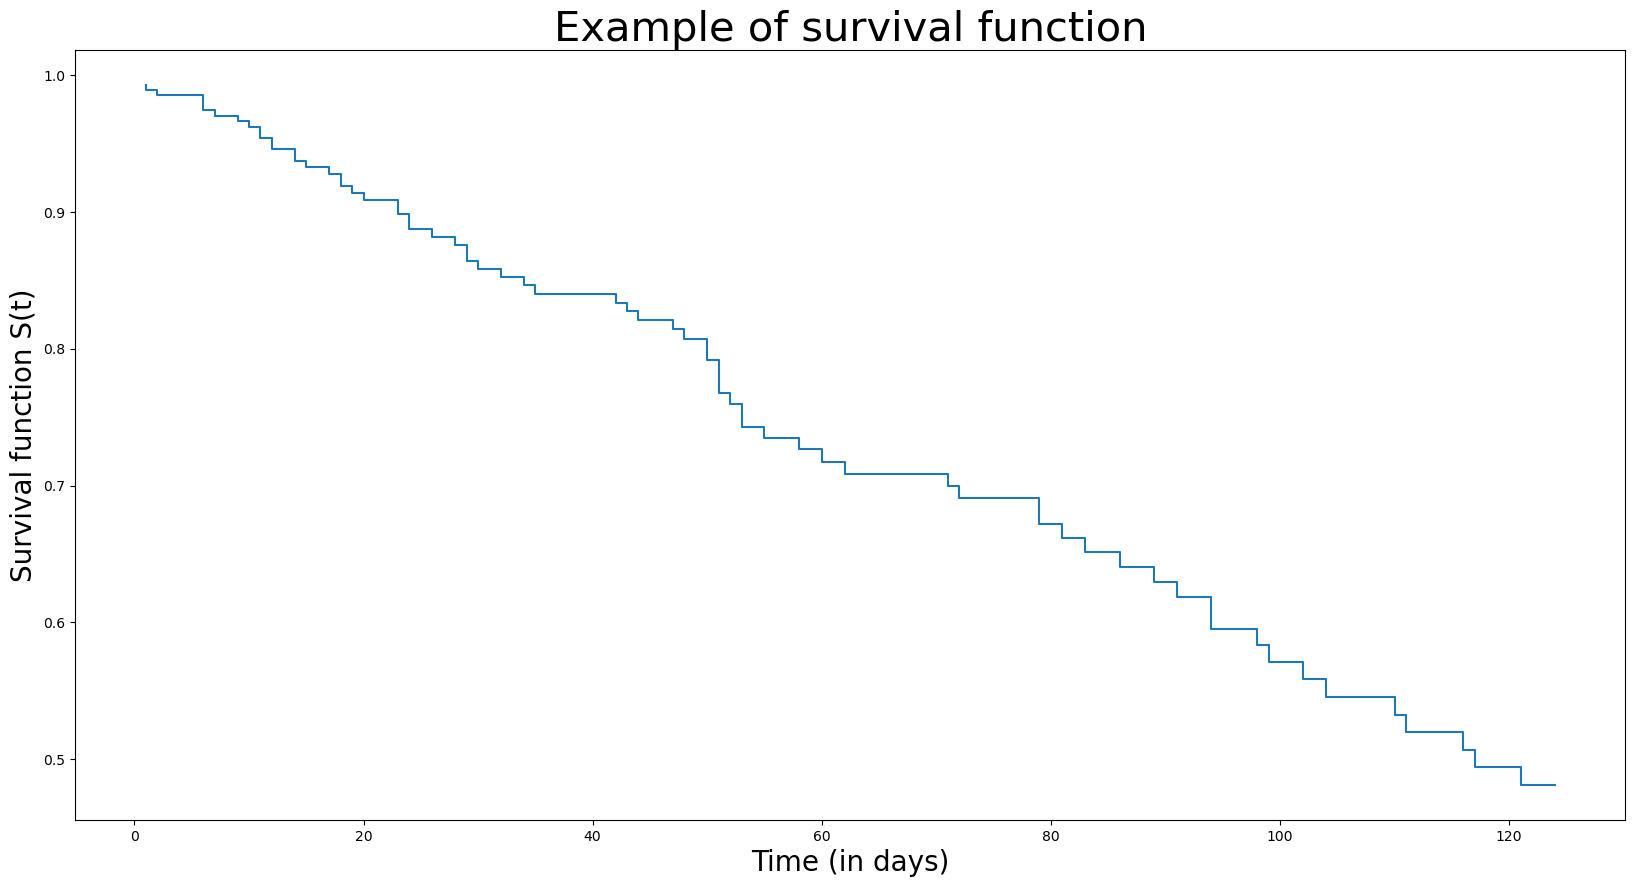

Patient:


,age,cell_type#smallcell,cell_type#squamous,cell_type#large,karnofsky_score,months_from_diagnosis,prior_therapy,treatment,pcens,psurv
67,53.0,0.0,0.0,1.0,70.0,8.0,1.0,0.0,1.0,250.0


In [11]:
import matplotlib.pyplot as plt

prediction = COX.model.predict_survival_function(DATA_TEST.psurv.features)[0]

x = list(range(1, 125))
y = list(map(prediction, x))

plt.figure(figsize=(20, 10))
plt.step(x, y)

plt.title("Example of survival function", fontsize=30)
plt.xlabel("Time (in days)", fontsize=20)
plt.ylabel("Survival function S(t)", fontsize=20)
plt.show()

print("Patient:")

SCALER.undo(DATA_TEST).head(1)

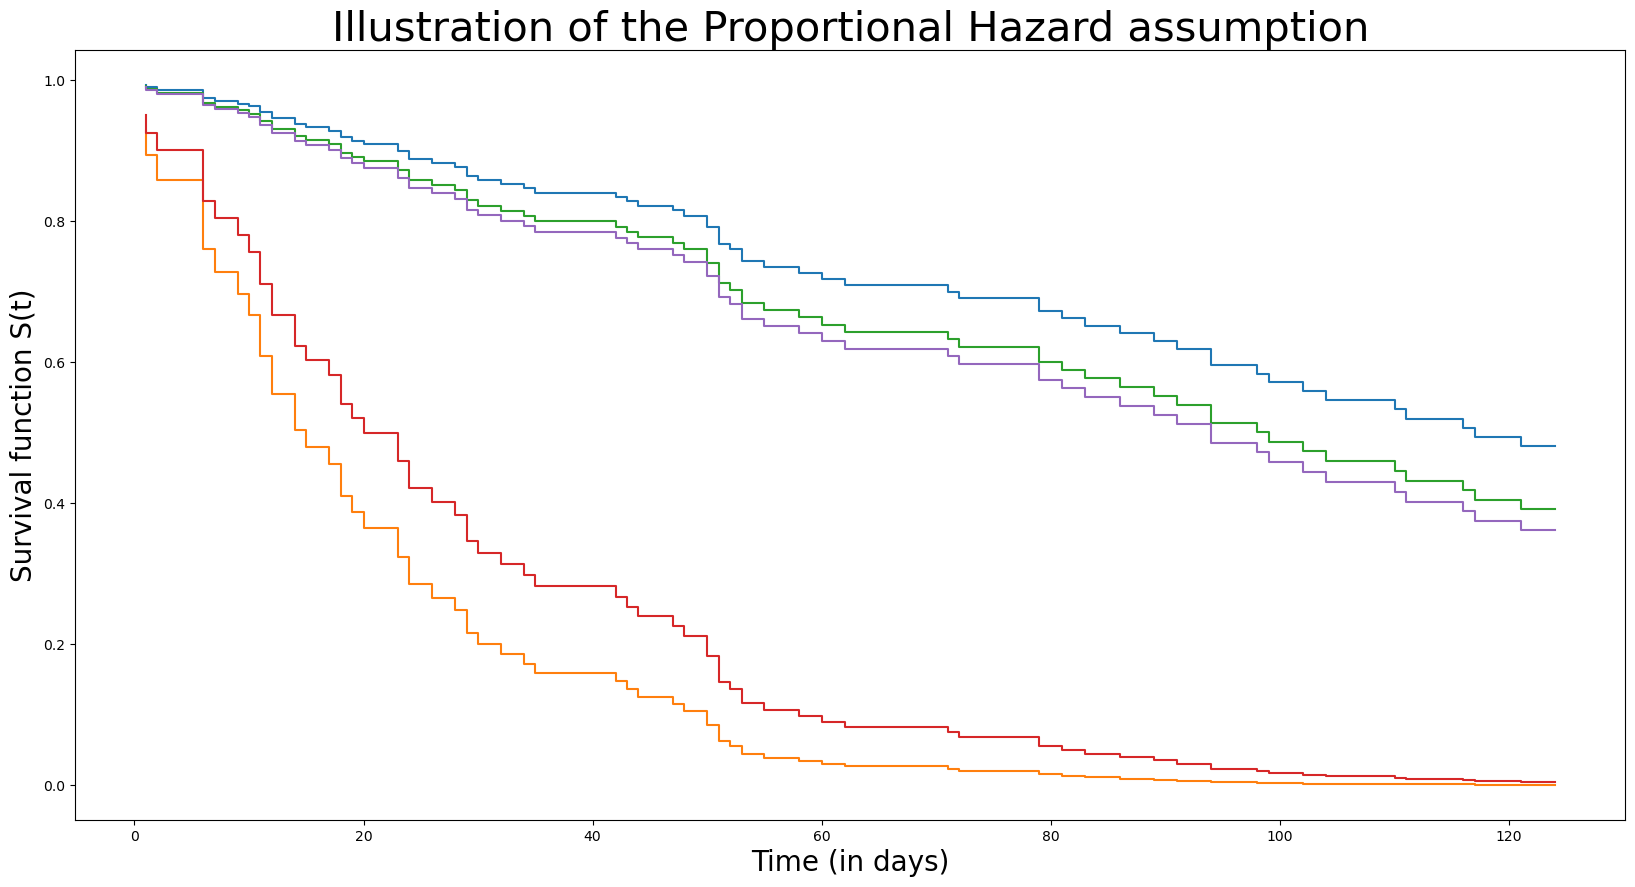

In [12]:
plt.figure(figsize=(20, 10))

for i in range(5):
    prediction = COX.model.predict_survival_function(DATA_TEST.psurv.features)[i]

    x = list(range(1, 125))
    y = list(map(prediction, x))

    plt.step(x, y)

plt.title("Illustration of the Proportional Hazard assumption", fontsize=30)
plt.xlabel("Time (in days)", fontsize=20)
plt.ylabel("Survival function S(t)", fontsize=20)
plt.show()

In [13]:
l = len("months_from_diagnosis")

print("Cox covariate effects coefficients:")
for col, coef in zip(DATA_TEST.psurv.features.columns, COX.model.coef_):
    print("\t> {0}{2} : {1}".format(col, coef, " " * (l - len(col))))

Cox covariate effects coefficients:
	> age                   : -0.021396878390861084
	> cell_type#smallcell   : -0.1511913855087868
	> cell_type#squamous    : -1.130377489176052
	> cell_type#large       : -0.6237836124845496
	> karnofsky_score       : -0.7230908129865994
	> months_from_diagnosis : 0.022565877100699763
	> prior_therapy         : 0.21627179720683654
	> treatment             : 0.28130590907565683


# DeepHit

In [14]:
from xmlot.models.pycox import DeepHit
from xmlot.data.discretise import BalancedDiscretiser
import torchtuples  as tt

SIZE_GRID = 100

DISCRETISER = BalancedDiscretiser(DATA_TRAIN, PSURV_CODE, SIZE_GRID)
data_train  = DISCRETISER(DATA_TRAIN).drop(columns=["pclass"], errors='ignore')
data_val    = DISCRETISER(DATA_TEST).drop( columns=["pclass"], errors='ignore')

DEEPHIT = DeepHit(
    accessor_code=PSURV_CODE,
    hyperparameters={
        "in_features"  : 8,
        "num_nodes_shared" : [32],
        "num_nodes_indiv" : [32],
        "num_risks" : 1,
        "out_features" : SIZE_GRID,
        "cuts"         : DISCRETISER.grid,
        "batch_norm"   : True,
        "dropout"      : 0.1,
        "alpha"        : 0.2,
        "sigma"        : 0.1,
        "seed"         : 42,
    }
) 



In [15]:
DEEPHIT.fit(
    data_train, 
    parameters={
        "batch_size" : 5,
        "lr"         : 1e-4 ,
        "tolerance"  : 100,
        "epochs"     : 1024,
        "callbacks"  : [tt.callbacks.EarlyStopping()],
        "verbose"    : True,
        "val_data"   : data_val,
        "seed"       : 24
    }
)

/home/engs2446/Softwares/miniconda3/envs/_xamelot_/lib/python3.10/site-packages/torchtuples/callbacks.py:607: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at /opt/conda/conda-bld/pytorch_1682343904639/work/torch/csrc/utils/python_arg_parser.cpp:1485.)
  p.data = p.data.add(-weight_decay * eta, p.data)


0:	[0s / 0s],		train_loss: 1.2085,	val_loss: 1.2468
1:	[0s / 0s],		train_loss: 1.2150,	val_loss: 1.6597
2:	[0s / 0s],		train_loss: 1.2153,	val_loss: 1.7881
3:	[0s / 0s],		train_loss: 1.1989,	val_loss: 1.7761
4:	[0s / 0s],		train_loss: 1.2251,	val_loss: 1.7501
5:	[0s / 0s],		train_loss: 1.2279,	val_loss: 1.8080
6:	[0s / 0s],		train_loss: 1.1939,	val_loss: 1.6698
7:	[0s / 0s],		train_loss: 1.1950,	val_loss: 1.6950
8:	[0s / 0s],		train_loss: 1.2037,	val_loss: 1.6951
9:	[0s / 0s],		train_loss: 1.1981,	val_loss: 1.6981
10:	[0s / 0s],		train_loss: 1.1908,	val_loss: 1.7514


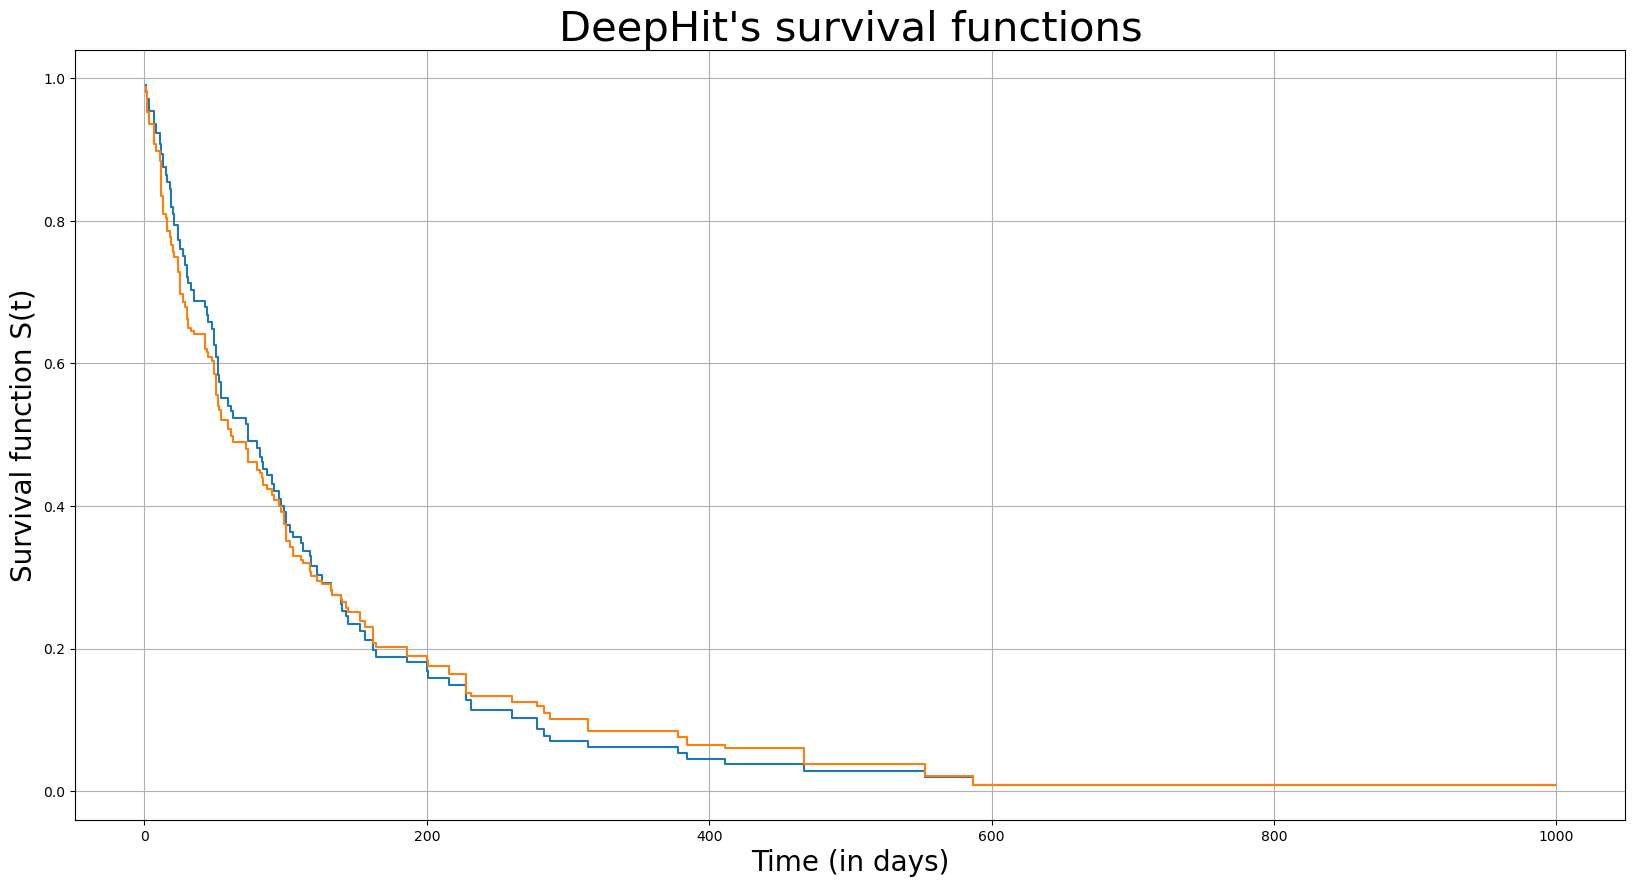

In [16]:
idx = 0

plt.figure(figsize=(20, 10))
for idx in range(2):
    patient = SCALER.undo(data_val).iloc[idx]


    survival_function = DEEPHIT.model.predict_surv_df(data_val.psurv.features.values).transpose().iloc[idx]
    grid              = DISCRETISER.grid

    plt.step(grid, survival_function)

plt.title("DeepHit's survival functions", fontsize=30)
plt.xlabel("Time (in days)", fontsize=20)
plt.ylabel("Survival function S(t)", fontsize=20)
plt.grid()
plt.show()


# Classification

In [17]:
from xmlot.data.dataframes import build_classification_accessor

PCLASS_CODE = "pclass"
build_classification_accessor(
    "pclass", 
    accessor_code=PCLASS_CODE, 
    exceptions = ["pcens", "psurv"]
)

xmlot.data.dataframes.build_classification_accessor.<locals>.ClassificationAccessor

In [18]:
from xmlot.data.build import build_single_classification_from_survival as build_classification_from_survival

DATA["pclass"] = build_classification_from_survival(
        DATA,
        60,
        xcens="pcens",
        xsurv="psurv"
)

DATA_TRAIN["pclass"] = build_classification_from_survival(
        DATA_TRAIN,
        60,
        xcens="pcens",
        xsurv="psurv"
)

# Drop censored data for training
DATA_TRAIN = DATA_TRAIN.drop(DATA_TRAIN[DATA_TRAIN["pclass"] == 2.0].index)

DATA_TEST["pclass"] = build_classification_from_survival(
        DATA_TEST,
        60,
        xcens="pcens",
        xsurv="psurv"
)

In [19]:
DATA["pclass"] = DATA["pclass"].apply(lambda x: {0.: "Dead", 1.: "Alive", 2.: "Censored"}[x])

In [20]:
DATA[["pcens", "psurv", "pclass"]].iloc[[0, 5, 9, 13]]

,pcens,psurv,pclass
0,Dead,72.0,Dead
5,Dead,10.0,Alive
9,Censored,100.0,Dead
13,Censored,25.0,Censored


In [21]:
import numpy as np
from xmlot.models.scikit import NeuralNet

# Instanciate a model with its hyperparameters
NN = NeuralNet(
    accessor_code=PCLASS_CODE,
    hyperparameters={
        "alpha" : 1,
        "max_iter" : 1000
    }
)

# Let's train it
NN = NN.fit(DATA_TRAIN, parameters=dict())

In [22]:
NN.predict(DATA_TRAIN.pclass.features)[:5]

array([0.19518976, 0.98468983, 0.18253724, 0.10135424, 0.57529867],
      dtype=float32)

In [41]:
DATA_TRAIN.pclass.targets

,pclass
119,0.0
80,1.0
3,0.0
51,0.0
18,1.0
...,...
98,0.0
134,0.0
15,1.0
70,0.0


# SHAP

In [38]:
from xmlot.misc.misc import set_seed
from xmlot.data.split import split_dataset
import shap

T     = 60

# Build X
# df = EMBEDDED_DATA.copy()
# df["pclass"] = build_classification_from_survival(
#     df,
#     T,
#     PSURV_CODE
# )
# df = SCALER(df)
        
X_typical, X   = split_dataset(
    DATA_TEST, 
    [10/137, 127/137], 
        main_target="pclass"
)
    
X_typical = X_typical.drop(columns=["pclass", "pcens", "psurv"])
X         = X.drop(columns=["pclass", "pcens", "psurv"])
    
    
# Get Model

EXPLAINER = shap.KernelExplainer(
    lambda x: NN.model.predict_proba(x), 
    X_typical
)
 
SHAP_VALUES = EXPLAINER.shap_values(X)

  0%|          | 0/23 [00:00<?, ?it/s]

Explanation: prediction of being alive after 60 days


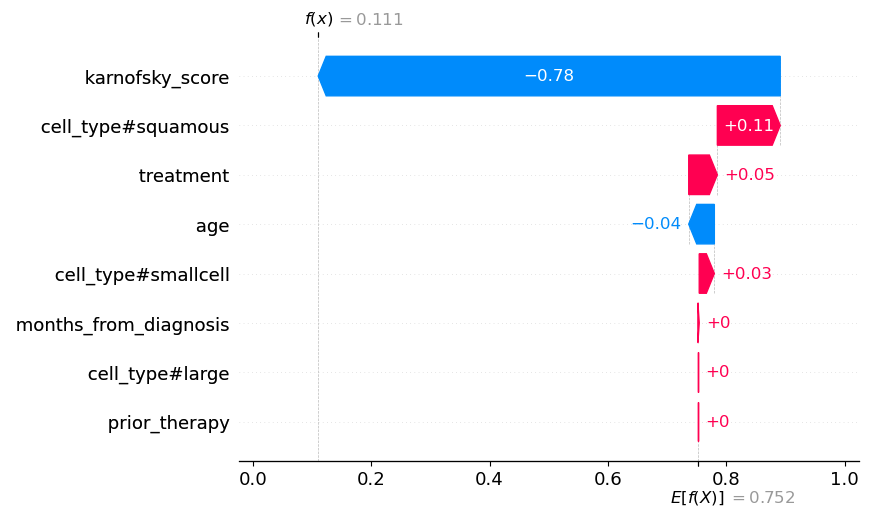

Patient:


age                      62.0
cell_type#smallcell       1.0
cell_type#squamous        0.0
cell_type#large           0.0
karnofsky_score          85.0
months_from_diagnosis     4.0
prior_therapy             0.0
treatment                 1.0
Name: 100, dtype: float32

In [39]:
idx=2
explained_label = 1  # Alive

print("Explanation: prediction of being alive after 60 days")

shap.plots._waterfall.waterfall_legacy(
    EXPLAINER.expected_value[explained_label], 
    SHAP_VALUES[explained_label][idx], 
    X.iloc[idx]
)

print("Patient:")
SCALER.undo(X).iloc[idx]

SHAP values for 'being alive after 60 days':


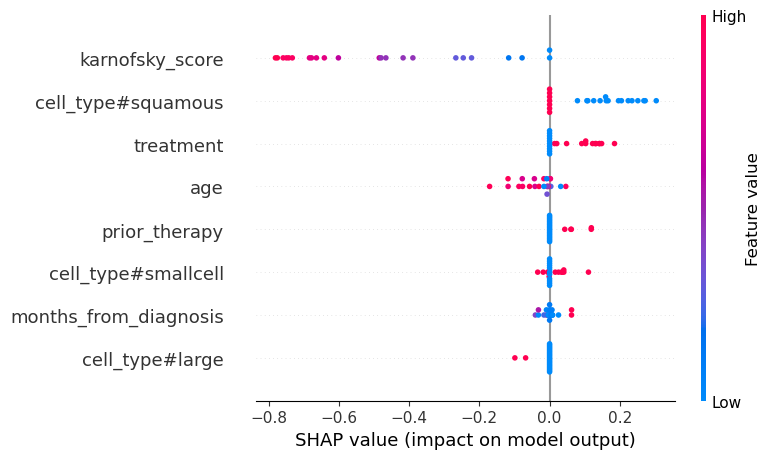

In [40]:
explained_label = 1  # Alive

print("SHAP values for 'being alive after {0} days':".format(T))
shap.summary_plot(SHAP_VALUES[explained_label], X)

# Benchmark

In [42]:
from xmlot.benchmark import benchmark, TalkativeBenchmarkVisitor
from sklearn.metrics import roc_auc_score

t = 60

# Models to compare
models = {
    "Cox"       : {
        "model"      : ScikitCoxModel(
            accessor_code=PSURV_CODE, 
            hyperparameters={
                'alpha' : 0.1
            }
        ),
        "parameters" : {}
    }, 
    "Neural net": {
        "model"      : NeuralNet(
            accessor_code=PCLASS_CODE,
            hyperparameters={
                "alpha" : 1,
                "max_iter" : 1000
            }
        ),
        "parameters" : {}
    }
}

# Metric
def auroc(model, df_test, **_):
    if model.accessor_code[1:] == "class":
        y_score = model.model.predict_proba(getattr(df_test, model.accessor_code).features.values)[:,1]
    else:
        y_score = list(map(
            lambda f: 1-f(t), # As alive is labelled by 1, we look for survival.
            model.model.predict_survival_function(getattr(df_test, model.accessor_code).features)
        ))

    y_true  = getattr(df_test, PCLASS_CODE).targets
    
    return roc_auc_score(y_true, y_score)

# Data
EMBEDDED_DATA["pclass"] = build_classification_from_survival(
        EMBEDDED_DATA,
        t,
        xcens="pcens",
        xsurv="psurv"
)
EMBEDDED_DATA = EMBEDDED_DATA.drop(EMBEDDED_DATA[EMBEDDED_DATA["pclass"] == 2.0].index)

# Scaler
def get_standardiser(_df_):
    return Scaler(
        _df_,
        PCLASS_CODE,
        OHE,
        **get_standardisation(_df_)
    )



RESULTS = benchmark(
    models,
    metric                = auroc,
    df                    = EMBEDDED_DATA,
    stratification_target = "pclass",
    get_scaler            = get_standardiser,
    k_fold                = 50,
    test_frac             = .2,
    k_bootstrap           = 10,
    bootstrap_frac        = .5,
    visitor               = TalkativeBenchmarkVisitor()
)


training data: 98, validation data: 2, test data: 26


--- TRAINING ---

> Fold 1/50
surv <xmlot.models.scikit.ScikitCoxModel object at 0x7fdb1f6d7490>
	> Cox
class <xmlot.models.scikit.NeuralNet object at 0x7fdb1f793df0>
	> Neural net
> Fold 2/50
surv <xmlot.models.scikit.ScikitCoxModel object at 0x7fdb1f7faec0>
	> Cox
class <xmlot.models.scikit.NeuralNet object at 0x7fdb1f7faef0>
	> Neural net
> Fold 3/50
surv <xmlot.models.scikit.ScikitCoxModel object at 0x7fdb1f7a3a90>
	> Cox
class <xmlot.models.scikit.NeuralNet object at 0x7fdb1ec12560>
	> Neural net
> Fold 4/50
surv <xmlot.models.scikit.ScikitCoxModel object at 0x7fdb1f7fab00>
	> Cox
class <xmlot.models.scikit.NeuralNet object at 0x7fdb1f7fb0d0>
	> Neural net
> Fold 5/50
surv <xmlot.models.scikit.ScikitCoxModel object at 0x7fdb1ec11c00>
	> Cox
class <xmlot.models.scikit.NeuralNet object at 0x7fdb1ec13940>
	> Neural net
> Fold 6/50
surv <xmlot.models.scikit.ScikitCoxModel object at 0x7fdb1ec14a60>
	> Cox
class <xmlot.models.sciki

In [43]:
l = len("Neural Net")

print("AUROC:")
for model in ["Neural net", "Cox"]:
    scores = RESULTS[model]["test_scores"]
    print("\t> {0}{1} : {2}".format(model, " " * (l - len(model)), np.mean(scores))) 

AUROC:
	> Neural net : 0.9261904761904762
	> Cox        : 0.9404761904761905
